## DENCE NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


2.15.1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [4]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [5]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model
     

input_shape = 224, 224, 3
n_classes = 10

K.clear_session()
model = densenet(input_shape, n_classes)
model.summary() 




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 56, 56, 64)           256       ['max_pooling2d[0][0]']

 re_lu_7 (ReLU)              (None, 56, 56, 128)          0         ['batch_normalization_7[0][0]'
                                                                    ]                             
                                                                                                  
 conv2d_8 (Conv2D)           (None, 56, 56, 32)           36896     ['re_lu_7[0][0]']             
                                                                                                  
 concatenate_3 (Concatenate  (None, 56, 56, 192)          0         ['concatenate_2[0][0]',       
 )                                                                   'conv2d_8[0][0]']            
                                                                                                  
 batch_normalization_8 (Bat  (None, 56, 56, 192)          768       ['concatenate_3[0][0]']       
 chNormalization)                                                                                 
          

                                                                                                  
 batch_normalization_16 (Ba  (None, 28, 28, 128)          512       ['conv2d_16[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_16 (ReLU)             (None, 28, 28, 128)          0         ['batch_normalization_16[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_17 (Conv2D)          (None, 28, 28, 32)           36896     ['re_lu_16[0][0]']            
                                                                                                  
 concatenate_7 (Concatenate  (None, 28, 28, 192)          0         ['concatenate_6[0][0]',       
 )        

 conv2d_25 (Conv2D)          (None, 28, 28, 32)           36896     ['re_lu_24[0][0]']            
                                                                                                  
 concatenate_11 (Concatenat  (None, 28, 28, 320)          0         ['concatenate_10[0][0]',      
 e)                                                                  'conv2d_25[0][0]']           
                                                                                                  
 batch_normalization_25 (Ba  (None, 28, 28, 320)          1280      ['concatenate_11[0][0]']      
 tchNormalization)                                                                                
                                                                                                  
 re_lu_25 (ReLU)             (None, 28, 28, 320)          0         ['batch_normalization_25[0][0]
                                                                    ']                            
          

                                                                                                  
 re_lu_33 (ReLU)             (None, 28, 28, 448)          0         ['batch_normalization_33[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_34 (Conv2D)          (None, 28, 28, 128)          57472     ['re_lu_33[0][0]']            
                                                                                                  
 batch_normalization_34 (Ba  (None, 28, 28, 128)          512       ['conv2d_34[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_34 (ReLU)             (None, 28, 28, 128)          0         ['batch_normalization_34[0][0]
          

 e)                                                                  'conv2d_42[0][0]']           
                                                                                                  
 batch_normalization_42 (Ba  (None, 14, 14, 320)          1280      ['concatenate_19[0][0]']      
 tchNormalization)                                                                                
                                                                                                  
 re_lu_42 (ReLU)             (None, 14, 14, 320)          0         ['batch_normalization_42[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_43 (Conv2D)          (None, 14, 14, 128)          41088     ['re_lu_42[0][0]']            
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_51 (Conv2D)          (None, 14, 14, 128)          57472     ['re_lu_50[0][0]']            
                                                                                                  
 batch_normalization_51 (Ba  (None, 14, 14, 128)          512       ['conv2d_51[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_51 (ReLU)             (None, 14, 14, 128)          0         ['batch_normalization_51[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_52 (Conv2D)          (None, 14, 14, 32)           36896     ['re_lu_51[0][0]']            
          

                                                                    ']                            
                                                                                                  
 conv2d_60 (Conv2D)          (None, 14, 14, 32)           36896     ['re_lu_59[0][0]']            
                                                                                                  
 concatenate_28 (Concatenat  (None, 14, 14, 608)          0         ['concatenate_27[0][0]',      
 e)                                                                  'conv2d_60[0][0]']           
                                                                                                  
 batch_normalization_60 (Ba  (None, 14, 14, 608)          2432      ['concatenate_28[0][0]']      
 tchNormalization)                                                                                
                                                                                                  
 re_lu_60 

 batch_normalization_68 (Ba  (None, 14, 14, 736)          2944      ['concatenate_32[0][0]']      
 tchNormalization)                                                                                
                                                                                                  
 re_lu_68 (ReLU)             (None, 14, 14, 736)          0         ['batch_normalization_68[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_69 (Conv2D)          (None, 14, 14, 128)          94336     ['re_lu_68[0][0]']            
                                                                                                  
 batch_normalization_69 (Ba  (None, 14, 14, 128)          512       ['conv2d_69[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 batch_normalization_77 (Ba  (None, 14, 14, 128)          512       ['conv2d_77[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_77 (ReLU)             (None, 14, 14, 128)          0         ['batch_normalization_77[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_78 (Conv2D)          (None, 14, 14, 32)           36896     ['re_lu_77[0][0]']            
                                                                                                  
 concatenate_37 (Concatenat  (None, 14, 14, 896)          0         ['concatenate_36[0][0]',      
 e)       

 conv2d_86 (Conv2D)          (None, 14, 14, 32)           36896     ['re_lu_85[0][0]']            
                                                                                                  
 concatenate_41 (Concatenat  (None, 14, 14, 1024)         0         ['concatenate_40[0][0]',      
 e)                                                                  'conv2d_86[0][0]']           
                                                                                                  
 batch_normalization_86 (Ba  (None, 14, 14, 1024)         4096      ['concatenate_41[0][0]']      
 tchNormalization)                                                                                
                                                                                                  
 re_lu_86 (ReLU)             (None, 14, 14, 1024)         0         ['batch_normalization_86[0][0]
                                                                    ']                            
          

                                                                                                  
 re_lu_94 (ReLU)             (None, 7, 7, 128)            0         ['batch_normalization_94[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_95 (Conv2D)          (None, 7, 7, 32)             36896     ['re_lu_94[0][0]']            
                                                                                                  
 concatenate_45 (Concatenat  (None, 7, 7, 640)            0         ['concatenate_44[0][0]',      
 e)                                                                  'conv2d_95[0][0]']           
                                                                                                  
 batch_normalization_95 (Ba  (None, 7, 7, 640)            2560      ['concatenate_45[0][0]']      
 tchNormal

 e)                                                                  'conv2d_103[0][0]']          
                                                                                                  
 batch_normalization_103 (B  (None, 7, 7, 768)            3072      ['concatenate_49[0][0]']      
 atchNormalization)                                                                               
                                                                                                  
 re_lu_103 (ReLU)            (None, 7, 7, 768)            0         ['batch_normalization_103[0][0
                                                                    ]']                           
                                                                                                  
 conv2d_104 (Conv2D)         (None, 7, 7, 128)            98432     ['re_lu_103[0][0]']           
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_112 (Conv2D)         (None, 7, 7, 128)            114816    ['re_lu_111[0][0]']           
                                                                                                  
 batch_normalization_112 (B  (None, 7, 7, 128)            512       ['conv2d_112[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 re_lu_112 (ReLU)            (None, 7, 7, 128)            0         ['batch_normalization_112[0][0
                                                                    ]']                           
                                                                                                  
 conv2d_113 (Conv2D)         (None, 7, 7, 32)             36896     ['re_lu_112[0][0]']           
          

In [6]:
model_path = "DENCE.h5"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [7]:
epochs = 50
batch_size = 512

In [8]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/50


3/3 [==============================] - ETA: 0s - loss: 5.5625 - accuracy: 0.1146 - precision: 0.1094    
Epoch 1: accuracy improved from -inf to 0.11458, saving model to DENCE.h5
3/3 [==============================] - 50s 7s/step - loss: 5.5625 - accuracy: 0.1146 - precision: 0.1094 - val_loss: 2.3238 - val_accuracy: 0.1146 - val_precision: 0.0000e+00
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 5.5488 - accuracy: 0.1458 - precision: 0.1333
Epoch 2: accuracy improved from 0.11458 to 0.14583, saving model to DENCE.h5
3/3 [==============================] - 16s 6s/step - loss: 5.5488 - accuracy: 0.1458 - precision: 0.1333 - val_loss: 3.0267 - val_accuracy: 0.1146 - val_precision: 0.0000e+00
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 4.7855 - accuracy: 0.0833 - precision: 0.0625
Epoch 3: accuracy did not improve from 0.14583
3/3 [==============================] - 14s 5s/step - loss: 4.7855 - accuracy: 0.0833 - precision: 0.0625 - val

Epoch 24/50
3/3 [==============================] - ETA: 0s - loss: 2.0098 - accuracy: 0.3229 - precision: 0.7500
Epoch 24: accuracy improved from 0.30208 to 0.32292, saving model to DENCE.h5
3/3 [==============================] - 20s 7s/step - loss: 2.0098 - accuracy: 0.3229 - precision: 0.7500 - val_loss: 2.5719 - val_accuracy: 0.1458 - val_precision: 0.0000e+00
Epoch 25/50
3/3 [==============================] - ETA: 0s - loss: 2.1010 - accuracy: 0.2750 - precision: 0.3333
Epoch 25: accuracy did not improve from 0.32292
3/3 [==============================] - 16s 5s/step - loss: 2.1010 - accuracy: 0.2750 - precision: 0.3333 - val_loss: 2.5993 - val_accuracy: 0.1146 - val_precision: 0.0000e+00
Epoch 26/50
3/3 [==============================] - ETA: 0s - loss: 2.2727 - accuracy: 0.2500 - precision: 0.2000
Epoch 26: accuracy did not improve from 0.32292
3/3 [==============================] - 15s 6s/step - loss: 2.2727 - accuracy: 0.2500 - precision: 0.2000 - val_loss: 2.6381 - val_accurac

3/3 [==============================] - ETA: 0s - loss: 2.1100 - accuracy: 0.2604 - precision: 0.3226
Epoch 48: accuracy did not improve from 0.38542
3/3 [==============================] - 15s 6s/step - loss: 2.1100 - accuracy: 0.2604 - precision: 0.3226 - val_loss: 6.2831 - val_accuracy: 0.2188 - val_precision: 0.2317
Epoch 49/50
3/3 [==============================] - ETA: 0s - loss: 2.2841 - accuracy: 0.3333 - precision: 0.4545
Epoch 49: accuracy did not improve from 0.38542
3/3 [==============================] - 15s 6s/step - loss: 2.2841 - accuracy: 0.3333 - precision: 0.4545 - val_loss: 17.7734 - val_accuracy: 0.1771 - val_precision: 0.1493
Epoch 50/50
3/3 [==============================] - ETA: 0s - loss: 1.9248 - accuracy: 0.3875 - precision: 0.7273
Epoch 50: accuracy improved from 0.38542 to 0.38750, saving model to DENCE.h5
3/3 [==============================] - 15s 6s/step - loss: 1.9248 - accuracy: 0.3875 - precision: 0.7273 - val_loss: 18.8368 - val_accuracy: 0.1354 - val_pr

In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

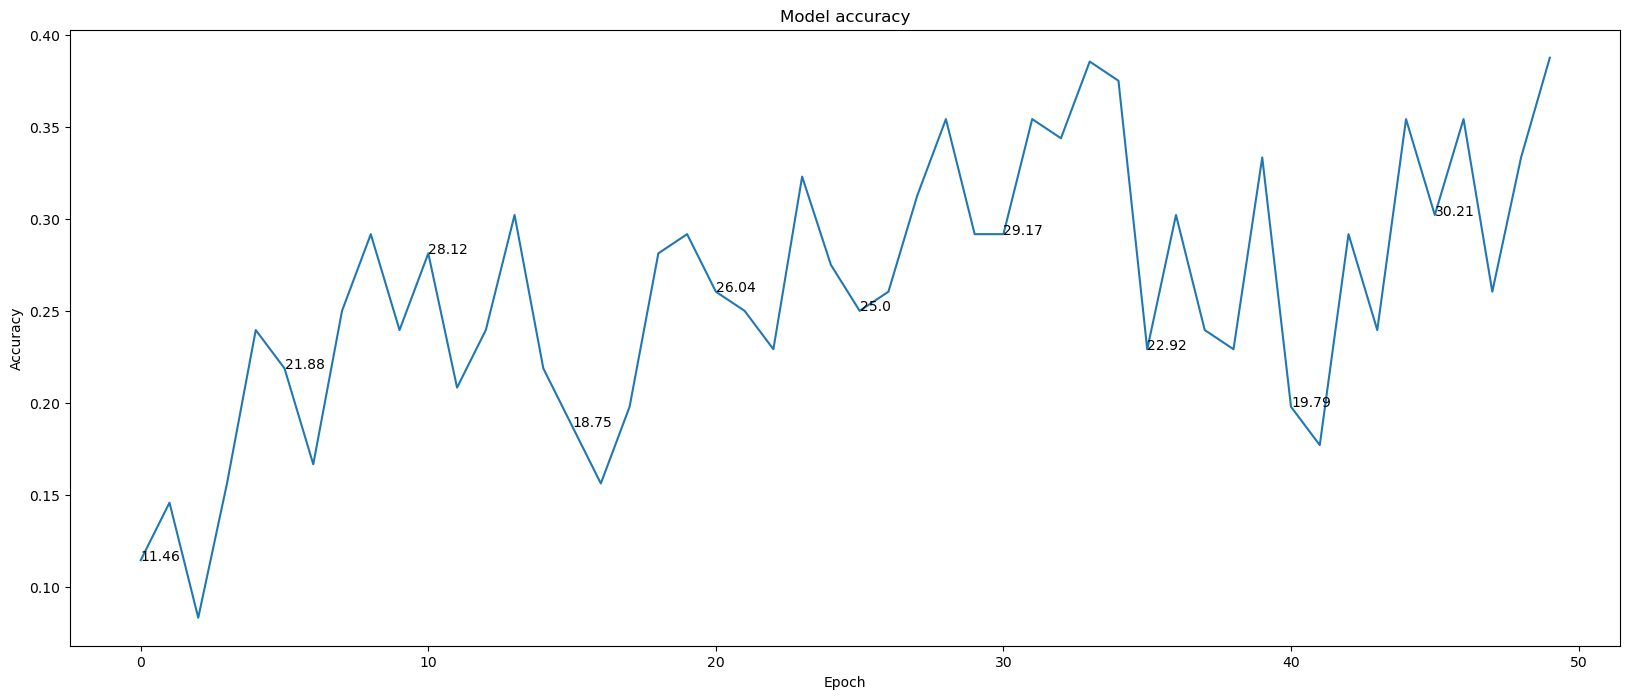

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

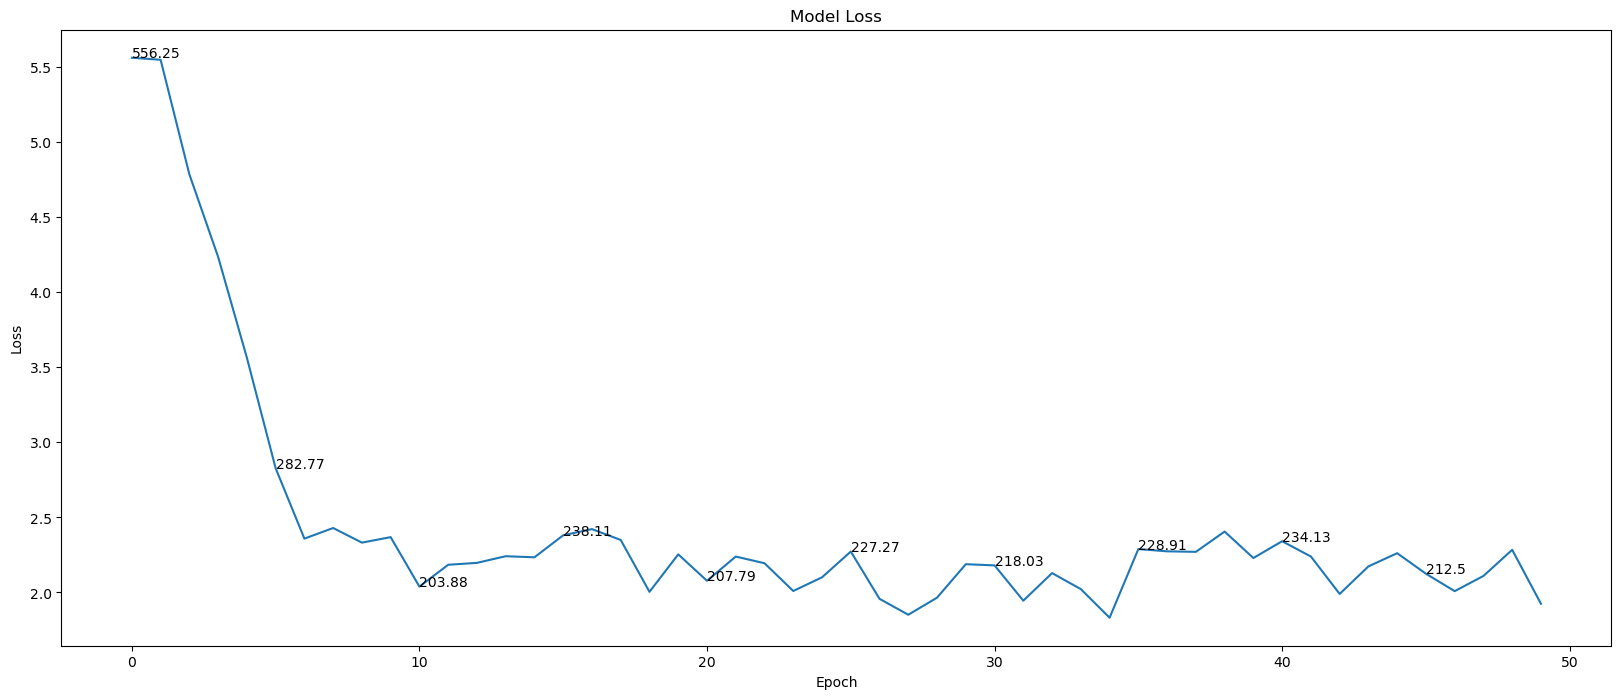

In [11]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#print(f'Precision:{precision.result().numpy()}, Recall:{recall.result().numpy()}, Accuracy:{accuracy.result().numpy()}') #for custom cnn model